In [1]:
# Data manipulation and file handling
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_csv_to_pkl_and_rename(path, class_name):
    for file in os.listdir(path):
        file_path = os.path.join(path, file)

        # Ensure it's a file and not a directory
        if os.path.isfile(file_path):
            if file.endswith(".csv"):
                # Read the CSV file
                data = pd.read_csv(file_path)

                # Determine the suffix based on the file name
                if "Accelerometer" in file:
                    suffix = "_acc"
                elif "Gyroscope" in file:
                    suffix = "_gyro"
                else:
                    continue  # Skip files that are neither Accelerometer nor Gyroscope

                # Create new filenames with the suffix
                new_base_name = f"{class_name}{suffix}"
                pkl_file_path = os.path.join(path, f"{new_base_name}.pkl")
                new_csv_file_path = os.path.join(path, f"{new_base_name}.csv")

                # Save the data as a pickle file
                data.to_pickle(pkl_file_path)

                # Rename the CSV file
                os.rename(file_path, new_csv_file_path)

                print(
                    f"Converted {file} to {new_base_name}.pkl and renamed CSV to {new_base_name}.csv"
                )


# Example usage
read_csv_to_pkl_and_rename("/Users/ahmedabd/Desktop/ML/lab4/newdata", "data")
# Example usage

Converted Accelerometer.csv to run5_acc.pkl and renamed CSV to run5_acc.csv
Converted Gyroscope.csv to run5_gyro.pkl and renamed CSV to run5_gyro.csv


In [8]:
def combine_pickles_with_class(path, class_name):
    # Initialize lists to hold acc and gyro files
    acc_files = []
    gyro_files = []

    # List all files in the directory
    for file in os.listdir(path):
        if file.startswith(class_name) and file.endswith("_acc.pkl"):
            acc_files.append(file)
        elif file.startswith(class_name) and file.endswith("_gyro.pkl"):
            gyro_files.append(file)

    # Create a list to hold the combined data for all the files
    combined_data_list = []

    # Rename columns appropriately for acc and gyro DataFrames
    for i in range(len(acc_files)):
        acc_df = pd.read_pickle(path + acc_files[i])
        gyro_df = pd.read_pickle(path + gyro_files[i])

        # Drop the first column (assumed to be an index or unneeded)

        # if num of columns is 4, then drop the first column
        if len(acc_df.columns) == 4:
            acc_df.drop(acc_df.columns[0], axis=1, inplace=True)
            gyro_df.drop(gyro_df.columns[0], axis=1, inplace=True)

        # Rename columns
        acc_df.columns = ["ax", "ay", "az"]
        gyro_df.columns = ["gx", "gy", "gz"]

        # Combine acc and gyro DataFrames horizontally
        combined_df = pd.concat([acc_df, gyro_df], axis=1)

        # # Add class column
        # combined_df["class"] = class_name

        # # Append the combined DataFrame to the list
        combined_data_list.append(combined_df)

    # Concatenate all DataFrames vertically to get the final combined DataFrame
    final_df = pd.concat(combined_data_list, ignore_index=True)

    return final_df


# test the function
r_data = combine_pickles_with_class("newdata/", "data")

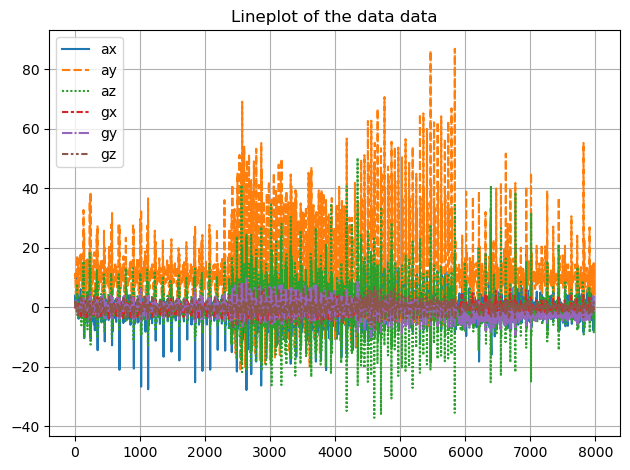

In [9]:
def plot_data_with_time(data, name):
    # create a figure and axis
    fig, ax = plt.subplots()
    # create a boxplot
    sns.lineplot(data=data, ax=ax)
    # set the title
    ax.set_title("Lineplot of the " + name + " data")

    # stratch the plot and show the grid
    plt.tight_layout()
    plt.grid()

    # show the plot
    plt.show()


# test the function
plot_data_with_time(r_data, "data")

In [15]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout


def build_gru_model(neurons, num_layers, input_shape, num_classes):
    model = Sequential()
    for i in range(num_layers):
        if i == 0:
            model.add(
                GRU(neurons, input_shape=input_shape, return_sequences=(num_layers > 1))
            )
        else:
            model.add(GRU(neurons, return_sequences=(i < num_layers - 1)))
        model.add(Dropout(0.2))  # You can adjust dropout

    model.add(Dense(num_classes, activation="softmax"))
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [16]:
# # Build the model1
model1 = build_gru_model(64, 4, input_shape, num_classes)
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 5, 64)             12864     
                                                                 
 dropout_6 (Dropout)         (None, 5, 64)             0         
                                                                 
 gru_7 (GRU)                 (None, 5, 64)             24960     
                                                                 
 dropout_7 (Dropout)         (None, 5, 64)             0         
                                                                 
 gru_8 (GRU)                 (None, 5, 64)             24960     
                                                                 
 dropout_8 (Dropout)         (None, 5, 64)             0         
                                                                 
 gru_9 (GRU)                 (None, 64)               

In [ ]:
# # Build the model
model1 = build_gru_model(64, 4, input_shape, num_classes)
model1.summary()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data and predictions
acc_data = np.random.randn(600, 3)  # Acceleration data
gyro_data = np.random.randn(600, 3)  # Gyro data
predicted_classes = np.random.randint(0, 4, 600)  # Predicted classes (random example)

# Plot acceleration data
plt.figure(figsize=(10, 6))
plt.plot(acc_data)
plt.title("Acceleration Data with Predicted Classes")
for i in range(4):  # Assuming 4 classes
    plt.axvline(x=i * 150, color="r", linestyle="--", label=f"Class {i}")
plt.legend()
plt.show()

# Plot gyro data
plt.figure(figsize=(10, 6))
plt.plot(gyro_data)
plt.title("Gyro Data with Predicted Classes")
for i in range(4):  # Assuming 4 classes
    plt.axvline(x=i * 150, color="r", linestyle="--", label=f"Class {i}")
plt.legend()
plt.show()